In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle 
import re


from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.feature_selection import RFE


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.feature_selection import RFE

# Libraries for text preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Text preparation 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enarm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\enarm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
pickle_in = open("indeed_db_v2.pickle", 'rb')
s_v2 = pickle.load(pickle_in)

oas = s_v2[s_v2['Salary_type'] == 'y']  ####Select job announce with annual salaries

#How many rows of type data
#oas['Job_class'].value_counts()

oas['Salary'] = oas['Salary'].astype('int') ##Convert Salary into integer 

oas = oas[oas['Contract'] != 'contrat pro'] ##Delete contrat pro 
oas.reset_index(drop=True, inplace=True)    ##reset index after dropping rows 
print(oas.shape)

dummy = oas[['Salary', 'description', 'Contract', 'Location', 'Job_class', 'Experience']]  ##Select feature columns

dummy = pd.get_dummies(dummy, prefix=['Contract', 'Location'], prefix_sep='_', \
                       columns= ['Contract', 'Location'], drop_first=True)   #columns cdd and Location_31 are deleted

(1669, 24)


C:\Users\enarm\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [3]:
dummy.head()

,Salary,description,Job_class,Experience,Contract_cdi,Contract_freelance / indépendant,Contract_intérim,Location_33,Location_44,Location_69,Location_75
0,70000,"localité bordeaux\nbadenoch + clark, cabinet d...",0,3,1,0,0,1,0,0,0
1,37500,l'entreprise\nmanpower cabinet recrutement bor...,0,1,1,0,0,1,0,0,0
2,40000,randstad search recrute pour un cabinet de con...,1,1,1,0,0,1,0,0,0
3,37500,"votre rôle, vos responsabilités\nnous menons u...",1,1,1,0,0,0,0,0,1
4,42500,"votre rôle, vos responsabilités\nnous menons u...",1,2,1,0,0,0,0,0,1


In [4]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 11 columns):
Salary                              1669 non-null int32
description                         1669 non-null object
Job_class                           1669 non-null int64
Experience                          1669 non-null int64
Contract_cdi                        1669 non-null uint8
Contract_freelance / indépendant    1669 non-null uint8
Contract_intérim                    1669 non-null uint8
Location_33                         1669 non-null uint8
Location_44                         1669 non-null uint8
Location_69                         1669 non-null uint8
Location_75                         1669 non-null uint8
dtypes: int32(1), int64(2), object(1), uint8(7)
memory usage: 57.2+ KB


In [5]:
dummy.describe()

,Salary,Job_class,Experience,Contract_cdi,Contract_freelance / indépendant,Contract_intérim,Location_33,Location_44,Location_69,Location_75
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000
mean,46755.412822,0.269023,1.395446,0.983823,0.002397,0.005992,0.048532,0.063511,0.153385,0.675255
std,11316.956818,0.443585,0.653805,0.126195,0.048911,0.077196,0.214952,0.243953,0.360466,0.468420
min,18127.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39500.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,52500.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,120000.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dummy.shape

(1669, 11)

# Explore the dataset in terms of word counts, most common and most uncommon words

In [7]:
#Fetch wordcount for each abstract
dummy['word_count'] = dummy['description'].apply(lambda x: len(str(x).split(" ")))
dummy[['description','word_count']].head()

,description,word_count
0,"localité bordeaux\nbadenoch + clark, cabinet d...",363
1,l'entreprise\nmanpower cabinet recrutement bor...,381
2,randstad search recrute pour un cabinet de con...,373
3,"votre rôle, vos responsabilités\nnous menons u...",609
4,"votre rôle, vos responsabilités\nnous menons u...",428


In [8]:
##Descriptive statistics of word counts
dummy.word_count.describe()

count    1669.000000
mean      303.995806
std       142.287645
min        13.000000
25%       211.000000
50%       279.000000
75%       369.000000
max      1493.000000
Name: word_count, dtype: float64

In [9]:
dummy.shape[1]

12

The average word count is about 303 words per abstract. The word count ranges from a minimum of 13 to a maximum of 1493. The word count is important to give us an indication of the size of the dataset that we are handling as well as the variation in word counts across the rows.

In [10]:
##Most common and uncommon words

In [11]:
#Identify common words
freq = pd.Series(' '.join(dummy['description']).split()).value_counts()[:20]
freq

de               30376
et               19968
des              12562
en               10607
la               10357
les               9289
à                 8896
vous              8853
:                 8311
le                6753
un                4946
une               4752
dans              4652
du                4580
pour              4308
sur               4267
au                3364
avec              3192
/                 3136
développement     2687
dtype: int64

In [12]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dummy['description']).split()).value_counts()[-20:]
freq1

l’automédication    1
copil               1
perfect             1
04.37.65.12.16      1
pré-cliniques       1
drones,             1
greentech,          1
dipl.               1
l’utilisateur.      1
innover,            1
xml-                1
webmarketing.       1
d’antony,           1
partage!            1
matlab/labview).    1
taxes               1
sellers,            1
orienté(e)client    1
ambiance.           1
(culture            1
dtype: int64

# Text Pre-processing


In [13]:
##Creating lists of stop words and adding custom stopwords
stop_words = set(stopwords.words("french"))
stop_words_fr = set(stopwords.words("english"))

stop_words.update(stop_words_fr)

##Creating a list of custom stopwords
new_words = ['an', 'poste', 'int', 'exp', 'emploi', 'salaire', 'an', 'entreprise', 'plu', 'profil', \
            'domaine', 'autre', 'etes', 'plus', 'etc', 'ainsi', 'egalement', 'cadre', 'filiale', 'cabinet', \
             'conseil', 'recrutement', 'recherche', 'industrielles', 'type', 'environ', 'sein', 'moins', 'pourquoi'\
            'aujourd', 'hui', 'chez']
stop_words = stop_words.union(new_words)

In [14]:
len(stop_words)

356

In [15]:
###Clean and normalize 

corpus = []
for i in range(dummy.shape[0]):
    
    #Replace accenture 
    text = re.sub('é', 'e', dummy['description'][i])
    text = re.sub('è', 'e', text)
    text = re.sub('ê', 'e', text)
    text = re.sub('à', 'a', text)
    text = re.sub('â', 'a', text)
    text = re.sub('î', 'i', text)
    text = re.sub('û', 'u', text)
    text = re.sub('ù', 'u', text)
    text = re.sub('ô', 'o', text)
    text = re.sub('ç', 'c', text)
    
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)
        
    #remove tags
    #text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    
    # remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [16]:
dummy['corpus'] = pd.Series(corpus)

In [17]:
dummy.head()

,Salary,description,Job_class,Experience,Contract_cdi,Contract_freelance / indépendant,Contract_intérim,Location_33,Location_44,Location_69,Location_75,word_count,corpus
0,70000,"localité bordeaux\nbadenoch + clark, cabinet d...",0,3,1,0,0,1,0,0,0,363,localite bordeaux badenoch clark cadre dirigea...
1,37500,l'entreprise\nmanpower cabinet recrutement bor...,0,1,1,0,0,1,0,0,0,381,manpower bordeaux client acteur secteur indust...
2,40000,randstad search recrute pour un cabinet de con...,1,1,1,0,0,1,0,0,0,373,randstad search recrute specialise donnee cons...
3,37500,"votre rôle, vos responsabilités\nnous menons u...",1,1,1,0,0,0,0,0,1,609,role responsabilites menons campagne dediee pr...
4,42500,"votre rôle, vos responsabilités\nnous menons u...",1,2,1,0,0,0,0,0,1,428,role responsabilites menons campagne dediee pr...


In [18]:
for i in dummy.columns:
    print(i)

Salary
description
Job_class
Experience
Contract_cdi
Contract_freelance / indépendant
Contract_intérim
Location_33
Location_44
Location_69
Location_75
word_count
corpus


In [19]:
corpus[0]

'localite bordeaux badenoch clark cadre dirigeants client fabricant battery groupe total chef projet si industriel h f directement rattache directeur application data contexte nouvel investissement industriel lance fin chef projet si industriel h f pilotera mise place manufacturing execution system scada supervision autres application gmao maintenance qms qualite leurs interface erp plm automates programmables infrastructure travaillera relation equipes operationnelles industrialisation production qualite maintenance corporate editeurs integrateurs respect contraintes budget planning standard application infrastructure cyber securite issue deploiement application assurera transfert vers equipe support locale pilotera upgrade managera deploiement si nouveaux investissements industriels mission garant e suivi projet si industriel respect planning defini budget qualite assurez reporting comite projet communication avancement couts associes analyse risques suivi investissements depenses ex

# Data Exploration

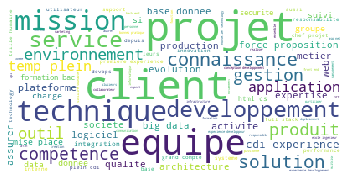

In [20]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stop_words,
                      max_words=100,
                      max_font_size=50,
                      random_state=42).generate(str(corpus))

print(wordcloud)

fig = plt.figure(20)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

# Text preparation (Tokenisation and Vectorisation)

In [21]:
cv = CountVectorizer(max_df=0.8, stop_words = stop_words, max_features = 10000, ngram_range = (1,3))
X = cv.fit_transform(corpus)

In [22]:
X

<1669x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 309325 stored elements in Compressed Sparse Row format>

In [23]:
list(cv.vocabulary_.keys())[:1130]

['bordeaux',
 'dirigeants',
 'client',
 'groupe',
 'total',
 'chef',
 'projet',
 'si',
 'industriel',
 'directement',
 'rattache',
 'directeur',
 'application',
 'data',
 'contexte',
 'nouvel',
 'investissement',
 'lance',
 'fin',
 'mise',
 'place',
 'manufacturing',
 'execution',
 'system',
 'supervision',
 'autres',
 'maintenance',
 'qualite',
 'leurs',
 'interface',
 'erp',
 'infrastructure',
 'travaillera',
 'relation',
 'equipes',
 'operationnelles',
 'industrialisation',
 'production',
 'corporate',
 'editeurs',
 'integrateurs',
 'respect',
 'contraintes',
 'budget',
 'planning',
 'standard',
 'cyber',
 'securite',
 'issue',
 'deploiement',
 'assurera',
 'transfert',
 'vers',
 'equipe',
 'support',
 'locale',
 'nouveaux',
 'investissements',
 'industriels',
 'mission',
 'garant',
 'suivi',
 'defini',
 'assurez',
 'reporting',
 'comite',
 'communication',
 'avancement',
 'couts',
 'associes',
 'analyse',
 'risques',
 'exploitation',
 'preparez',
 'technique',
 'metier',
 'supervis

# Visualize top N uni-grams, bi-grams & tri-grams

[Text(0, 0, 'developpement'),
 Text(0, 0, 'client'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'technique'),
 Text(0, 0, 'equipe'),
 Text(0, 0, 'projets'),
 Text(0, 0, 'data'),
 Text(0, 0, 'mission'),
 Text(0, 0, 'an'),
 Text(0, 0, 'solution'),
 Text(0, 0, 'web'),
 Text(0, 0, 'service'),
 Text(0, 0, 'cdi'),
 Text(0, 0, 'donnees'),
 Text(0, 0, 'application'),
 Text(0, 0, 'competence'),
 Text(0, 0, 'developpeur'),
 Text(0, 0, 'projet'),
 Text(0, 0, 'formation'),
 Text(0, 0, 'gestion')]

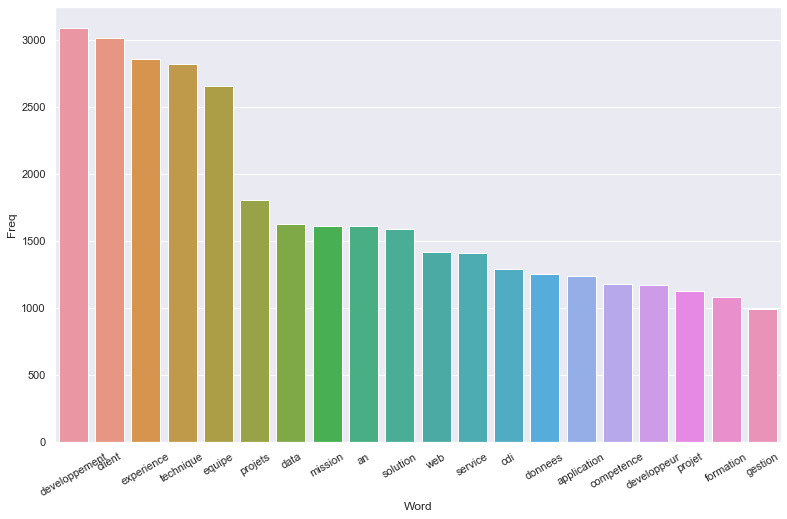

In [24]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                     Bi-gram  Freq
0                 temp plein   451
1             cdi experience   431
2              an experience   385
3          force proposition   379
4               base donnees   333
5                  plein cdi   318
6                   big data   313
7                 mise place   292
8              formation bac   275
9                    html cs   262
10       premiere experience   262
11            taille humaine   254
12                full stack   252
13              similaire an   220
14      nouvelles technology   216
15               chef projet   215
16                 front end   214
17               an souhaite   211
18  experience developpement   208
19             grand comptes   207


[Text(0, 0, 'temp plein'),
 Text(0, 0, 'cdi experience'),
 Text(0, 0, 'an experience'),
 Text(0, 0, 'force proposition'),
 Text(0, 0, 'base donnees'),
 Text(0, 0, 'plein cdi'),
 Text(0, 0, 'big data'),
 Text(0, 0, 'mise place'),
 Text(0, 0, 'formation bac'),
 Text(0, 0, 'html cs'),
 Text(0, 0, 'premiere experience'),
 Text(0, 0, 'taille humaine'),
 Text(0, 0, 'full stack'),
 Text(0, 0, 'similaire an'),
 Text(0, 0, 'nouvelles technology'),
 Text(0, 0, 'chef projet'),
 Text(0, 0, 'front end'),
 Text(0, 0, 'an souhaite'),
 Text(0, 0, 'experience developpement'),
 Text(0, 0, 'grand comptes')]

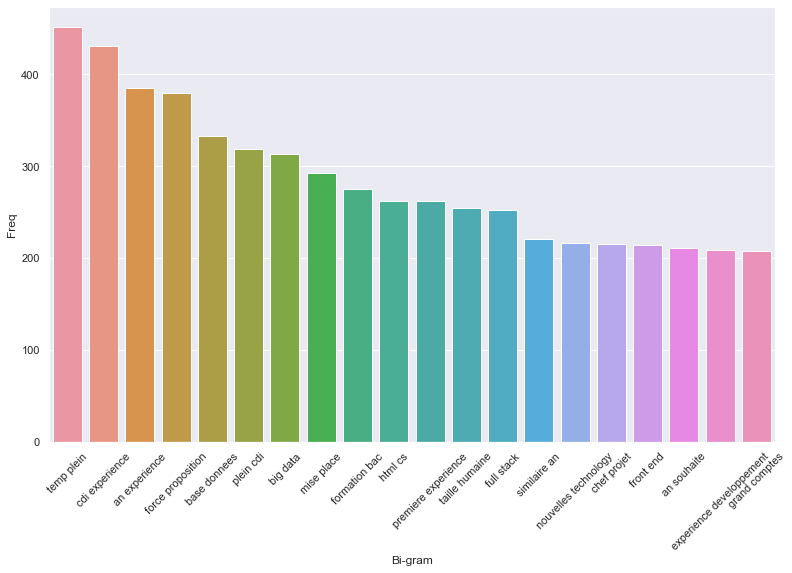

In [25]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                             Tri-gram  Freq
0                      temp plein cdi   318
1                plein cdi experience   225
2          cdi experience developpeur   179
3              etre force proposition   150
4               similaire an souhaite   136
5                forte valeur ajoutee    94
6                    developer cdi an    92
7                client grand comptes    87
8               minimum an experience    84
9                         asp net mvc    81
10                similaire an requis    77
11             developpeur full stack    68
12                 html cs javascript    67
13               full stack developer    64
14                 bon niveau anglais    64
15        an experience developpement    64
16  formation superieure informatique    63
17                       cdi an paris    60
18                     cdi temp plein    59
19              experience an minimum    57


[Text(0, 0, 'temp plein cdi'),
 Text(0, 0, 'plein cdi experience'),
 Text(0, 0, 'cdi experience developpeur'),
 Text(0, 0, 'etre force proposition'),
 Text(0, 0, 'similaire an souhaite'),
 Text(0, 0, 'forte valeur ajoutee'),
 Text(0, 0, 'developer cdi an'),
 Text(0, 0, 'client grand comptes'),
 Text(0, 0, 'minimum an experience'),
 Text(0, 0, 'asp net mvc'),
 Text(0, 0, 'similaire an requis'),
 Text(0, 0, 'developpeur full stack'),
 Text(0, 0, 'html cs javascript'),
 Text(0, 0, 'full stack developer'),
 Text(0, 0, 'bon niveau anglais'),
 Text(0, 0, 'an experience developpement'),
 Text(0, 0, 'formation superieure informatique'),
 Text(0, 0, 'cdi an paris'),
 Text(0, 0, 'cdi temp plein'),
 Text(0, 0, 'experience an minimum')]

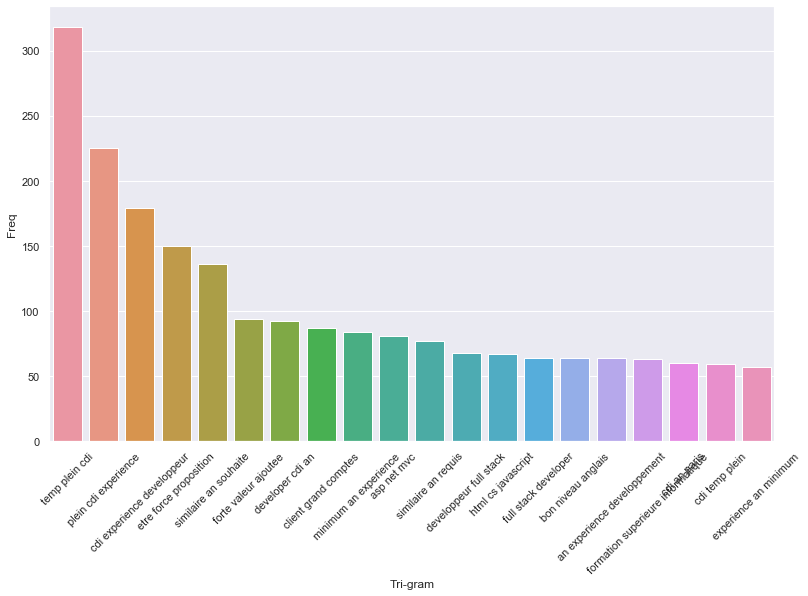

In [26]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

                             Tri-gram  Freq
0                      temp plein cdi   318
1                plein cdi experience   225
2          cdi experience developpeur   179
3              etre force proposition   150
4               similaire an souhaite   136
5                forte valeur ajoutee    94
6                    developer cdi an    92
7                client grand comptes    87
8               minimum an experience    84
9                         asp net mvc    81
10                similaire an requis    77
11             developpeur full stack    68
12                 html cs javascript    67
13               full stack developer    64
14                 bon niveau anglais    64
15        an experience developpement    64
16  formation superieure informatique    63
17                       cdi an paris    60
18                     cdi temp plein    59
19              experience an minimum    57


[Text(0, 0, 'temp plein cdi experience'),
 Text(0, 0, 'plein cdi experience developpeur'),
 Text(0, 0, 'formation bac master mba'),
 Text(0, 0, 'developer cdi an paris'),
 Text(0, 0, 'developer full stack developer'),
 Text(0, 0, 'kent marque groupagora dediee'),
 Text(0, 0, 'marque groupagora dediee recrutements'),
 Text(0, 0, 'groupagora dediee recrutements profils'),
 Text(0, 0, 'freelance independant cdi experience'),
 Text(0, 0, 'full stack developer cdi'),
 Text(0, 0, 'bac master mba requis'),
 Text(0, 0, 'an requis formation bac'),
 Text(0, 0, 'www linkedin com company'),
 Text(0, 0, 'backend developer cdi an'),
 Text(0, 0, 'requis formation bac master'),
 Text(0, 0, 'stack developer cdi an'),
 Text(0, 0, 'seyos specialise metier proposons'),
 Text(0, 0, 'specialise metier proposons candidats'),
 Text(0, 0, 'metier proposons candidats opportunites'),
 Text(0, 0, 'proposons candidats opportunites professionnelles')]

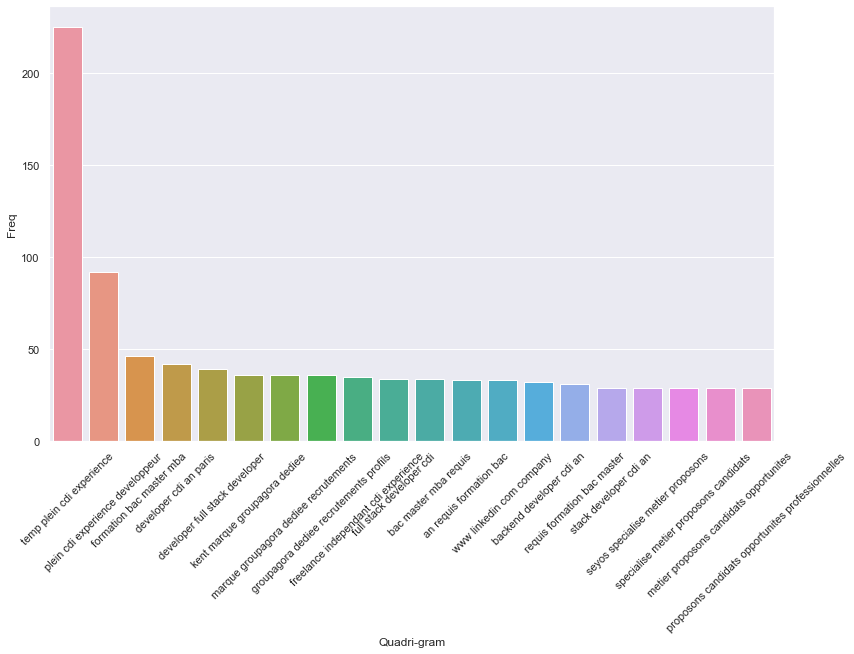

In [27]:
#Most frequently occuring Quatre-grams
def get_top_n4_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(4,4), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top4_words = get_top_n4_words(corpus, n=20)
top4_df = pd.DataFrame(top4_words)
top4_df.columns=["Quadri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Quadri-gram", y="Freq", data=top4_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

# Converting to a matrix of integers(TF-IDF)

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [29]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
localite bordeaux badenoch clark cadre dirigeants client fabricant battery groupe total chef projet si industriel h f directement rattache directeur application data contexte nouvel investissement industriel lance fin chef projet si industriel h f pilotera mise place manufacturing execution system scada supervision autres application gmao maintenance qms qualite leurs interface erp plm automates programmables infrastructure travaillera relation equipes operationnelles industrialisation production qualite maintenance corporate editeurs integrateurs respect contraintes budget planning standard application infrastructure cyber securite issue deploiement application assurera transfert vers equipe support locale pilotera upgrade managera deploiement si nouveaux investissements industriels mission garant e suivi projet si industriel respect planning defini budget qualite assurez reporting comite projet communication avancement couts associes analyse risques suivi investissements d

In [30]:
##All docs

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect=TfidfVectorizer(smooth_idf=True,use_idf=True)
tfidf_vect.fit(corpus)

# get feature names
tfidf_voca = tfidf_vect.vocabulary_

In [31]:
tfidf_voca_df = pd.DataFrame.from_dict(tfidf_voca, orient = 'index', columns = ['freq'])
tfidf_voca_df

,freq
localite,8724
bordeaux,1860
badenoch,1538
clark,2574
cadre,2062
dirigeants,4563
client,2614
fabricant,5989
battery,1616
groupe,6964


In [32]:
tfidf_voca_df = tfidf_voca_df.sort_values(by=['freq'], ascending=False)
tfidf_voca_df['coef'] = tfidf_voca_df['freq']/tfidf_voca_df['freq'].sum()

In [33]:
print('mean:',tfidf_voca_df['coef'].mean())
print('standard deviation:',tfidf_voca_df['coef'].std())
print('max:',tfidf_voca_df['coef'].max())
print('min:',tfidf_voca_df['coef'].min())
print('somme of all coef:', tfidf_voca_df['coef'].sum())
print('sample 1 coef:', tfidf_voca_df['coef'].sample(1))

mean: 6.30119722747322e-05
standard deviation: 3.638341791497041e-05
max: 0.0001260239445494644
min: 0.0
somme of all coef: 1.0
sample 1 coef: conviendra    0.000027
Name: coef, dtype: float64


##### Now tfidf_voca_df is a dataframe of words, their frequencies and coeff in probability langage

In [34]:
tfidf_voca_df.head()

,freq,coef
zwave,15869,0.000126
zuul,15868,0.000126
zoom,15867,0.000126
zookeper,15866,0.000126
zoning,15865,0.000126


##### As we can see, words are in index, so lets us sort its

In [35]:
tfidf_voca_df = tfidf_voca_df.reset_index()

In [36]:
tfidf_voca_df.head()

,index,freq,coef
0,zwave,15869,0.000126
1,zuul,15868,0.000126
2,zoom,15867,0.000126
3,zookeper,15866,0.000126
4,zoning,15865,0.000126


In [37]:
coef_dict = dict(zip(tfidf_voca_df['index'], tfidf_voca_df['coef'])) #Transfrom index (keyword col) and coef to dict

In [38]:
coef_dict['python']+coef_dict['java']+coef_dict['data']

0.00018969903355303146

In [39]:
dummy['sum_coef'] = float(0)
#dummy['sum_coef']
#coef_dict

##### Now let sum all coef of skills we could found in the desciption in each row. We start with the example of row 0

In [40]:
for key in coef_dict:
    if key in dummy['corpus'][0]:
        dummy['sum_coef'][0] += coef_dict[key]

C:\Users\enarm\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
dummy['sum_coef'][0]

0.038588430169619284

##### And then we do that for all rows

In [42]:
for i in range(dummy.shape[0]):
    for key in coef_dict:
        if key in dummy['corpus'][i]:
            dummy['sum_coef'][i] += coef_dict[key]

C:\Users\enarm\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
 dummy.shape

(1669, 14)

In [44]:
'bordeaux' in dummy['corpus'][0]

True

In [45]:
coef_dict['bordeaux']

1.477122294171049e-05

In [46]:
dummy['sum_coef'][0] = coef_dict['bordeaux']

C:\Users\enarm\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
dummy['sum_coef'][0]

1.477122294171049e-05

In [48]:
dummy['corpus'][0]

'localite bordeaux badenoch clark cadre dirigeants client fabricant battery groupe total chef projet si industriel h f directement rattache directeur application data contexte nouvel investissement industriel lance fin chef projet si industriel h f pilotera mise place manufacturing execution system scada supervision autres application gmao maintenance qms qualite leurs interface erp plm automates programmables infrastructure travaillera relation equipes operationnelles industrialisation production qualite maintenance corporate editeurs integrateurs respect contraintes budget planning standard application infrastructure cyber securite issue deploiement application assurera transfert vers equipe support locale pilotera upgrade managera deploiement si nouveaux investissements industriels mission garant e suivi projet si industriel respect planning defini budget qualite assurez reporting comite projet communication avancement couts associes analyse risques suivi investissements depenses ex

In [49]:
coef_dict['cyber']

3.0050703016899193e-05

In [50]:
tfidf_voca = sorted(tfidf_voca.items(), reverse=True)


In [51]:
tfidf_voca 

[('zwave', 15869),
 ('zuul', 15868),
 ('zoom', 15867),
 ('zookeper', 15866),
 ('zoning', 15865),
 ('zone', 15864),
 ('zoho', 15863),
 ('zk', 15862),
 ('ziwork', 15861),
 ('zipkin', 15860),
 ('zigbee', 15859),
 ('zf', 15858),
 ('zero', 15857),
 ('zepra', 15856),
 ('zeppelin', 15855),
 ('zeplin', 15854),
 ('zephyr', 15853),
 ('zenith', 15852),
 ('zenilyonnais', 15851),
 ('zenika', 15850),
 ('zendesk', 15849),
 ('zend', 15848),
 ('zen', 15847),
 ('zele', 15846),
 ('zb', 15845),
 ('zaion', 15844),
 ('zabbix', 15843),
 ('yvette', 15842),
 ('yves', 15841),
 ('yvelines', 15840),
 ('youtube', 15839),
 ('youtu', 15838),
 ('youtrack', 15837),
 ('yourexp', 15836),
 ('young', 15835),
 ('youday', 15834),
 ('york', 15833),
 ('yoopies', 15832),
 ('yon', 15831),
 ('yoga', 15830),
 ('yocto', 15829),
 ('ynsect', 15828),
 ('ynov', 15827),
 ('yiphzxi', 15826),
 ('yii', 15825),
 ('yeux', 15824),
 ('yespark', 15823),
 ('yes', 15822),
 ('yellofin', 15821),
 ('year', 15820),
 ('yarn', 15819),
 ('yard', 15818)

In [52]:
print(dummy.shape)
dummy.head(3)

(1669, 14)


,Salary,description,Job_class,Experience,Contract_cdi,Contract_freelance / indépendant,Contract_intérim,Location_33,Location_44,Location_69,Location_75,word_count,corpus,sum_coef
0,70000,"localité bordeaux\nbadenoch + clark, cabinet d...",0,3,1,0,0,1,0,0,0,363,localite bordeaux badenoch clark cadre dirigea...,0.000015
1,37500,l'entreprise\nmanpower cabinet recrutement bor...,0,1,1,0,0,1,0,0,0,381,manpower bordeaux client acteur secteur indust...,0.039564
2,40000,randstad search recrute pour un cabinet de con...,1,1,1,0,0,1,0,0,0,373,randstad search recrute specialise donnee cons...,0.035460


In [53]:
for i in dummy.columns:
    print(i)

Salary
description
Job_class
Experience
Contract_cdi
Contract_freelance / indépendant
Contract_intérim
Location_33
Location_44
Location_69
Location_75
word_count
corpus
sum_coef


In [54]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 14 columns):
Salary                              1669 non-null int32
description                         1669 non-null object
Job_class                           1669 non-null int64
Experience                          1669 non-null int64
Contract_cdi                        1669 non-null uint8
Contract_freelance / indépendant    1669 non-null uint8
Contract_intérim                    1669 non-null uint8
Location_33                         1669 non-null uint8
Location_44                         1669 non-null uint8
Location_69                         1669 non-null uint8
Location_75                         1669 non-null uint8
word_count                          1669 non-null int64
corpus                              1669 non-null object
sum_coef                            1669 non-null float64
dtypes: float64(1), int32(1), int64(3), object(2), uint8(7)
memory usage: 96.3+ KB


In [55]:
dummy.shape

(1669, 14)

##### Select input an output for train 

In [56]:
y=dummy['Salary']
X1=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','Contract_freelance / indépendant', 'sum_coef','Contract_intérim' ,'Contract_cdi']]

In [57]:
X1.shape

(1669, 10)

# Models

In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

##### We split the data to train and test 

In [59]:
#Diviser le dataset entre training et test set: ON partage notre jeu de données: 75% pour le training et 25% pour le testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

In [60]:
#Affichage de la matrice de confusion propre
from mlxtend.plotting import plot_confusion_matrix

In [61]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


score 0.13636363636363635


In [62]:
# Faire des prédictions sur votre test set
y_pred = logreg2.predict(X_test)  

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       21000       0.00      0.00      0.00         1
       21600       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00         3
       26000       0.00      0.00      0.00         1
       27500       0.00      0.00      0.00         2
       28000       0.00      0.00      0.00         1
       28500       0.00      0.00      0.00         1
       29000       0.00      0.00      0.00         1
       29500       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         6
       31000       0.00      0.00      0.00         3
       31500       0.00      0.00      0.00         1
       32000       0.00      0.00      0.00         4
       32500       0.00      0.00      0.00         8
       33000       0.00      0.00      0.00         2
       33500   

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 50 Features, elbow method

In [64]:
type(dummy.Salary)

pandas.core.series.Series

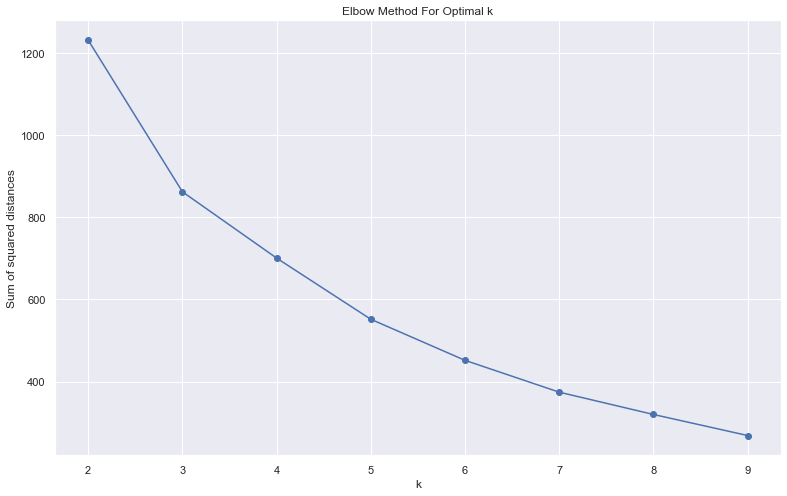

In [65]:
x_kmeans = dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','Contract_freelance / indépendant', 'sum_coef','Contract_intérim' ,'Contract_cdi']]

sum_of_squared_distances = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(x_kmeans)
    sum_of_squared_distances.append(kmeans.inertia_)  #Sum of squared distances of samples to their closest cluster center
    
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#centers = kmeans.cluster_centers_   #cluster_centers_ : Coordinates of cluster centers

In [66]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(x_kmeans)
y_kmeans = kmeans.predict(x_kmeans)

print(y_kmeans)

[2 3 3 ... 3 2 3]


In [67]:
x_kmeans.iloc[:,1]

0       1
1       1
2       1
3       0
4       0
       ..
1664    0
1665    0
1666    0
1667    0
1668    0
Name: Location_33, Length: 1669, dtype: uint8

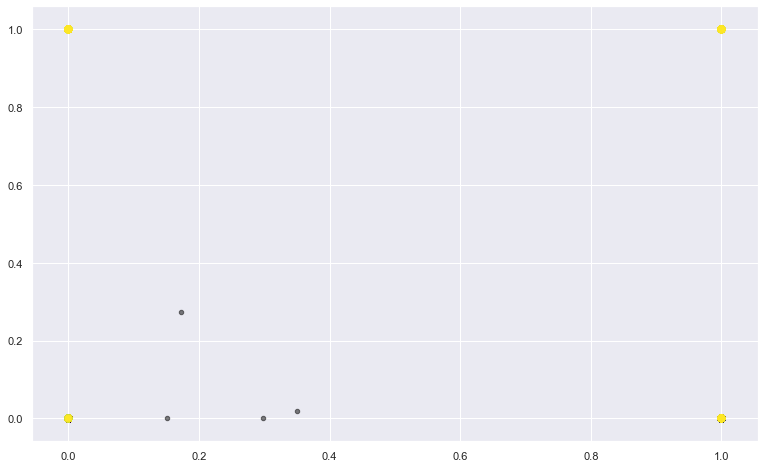

In [68]:
plt.scatter(x_kmeans.iloc[:, 0], x_kmeans.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)
plt.show()

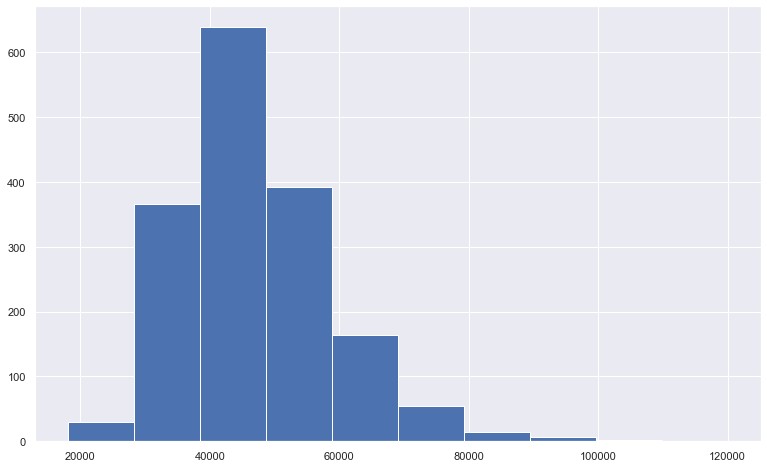

In [69]:
dummy['Salary'].hist()

### La chasse aux correlations

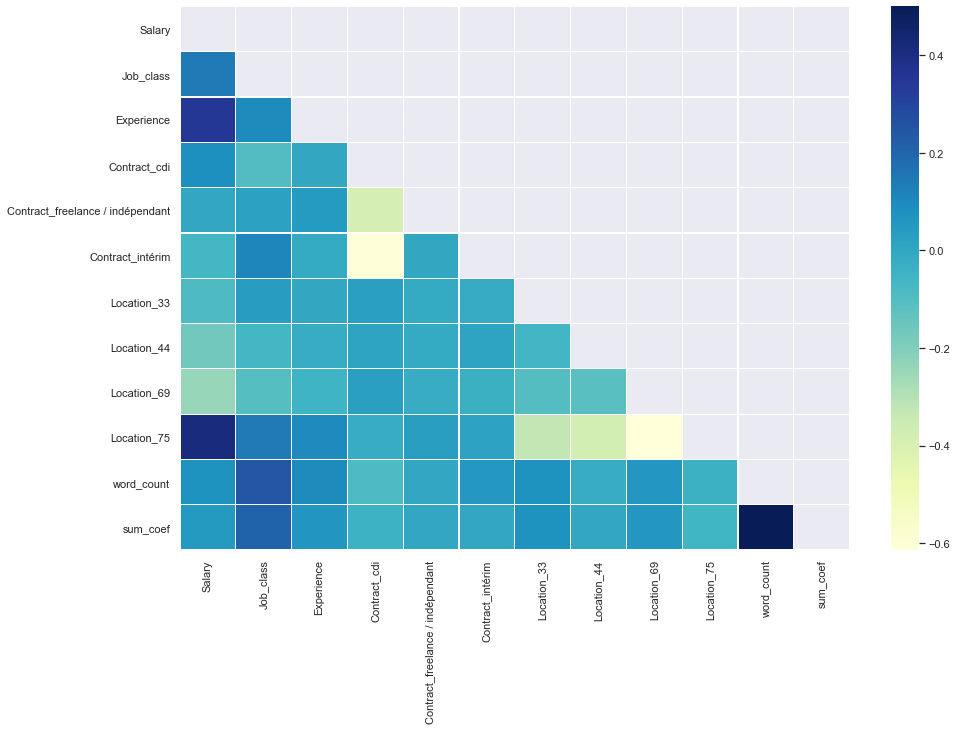

In [70]:
# Calculate correlations
corr = dummy.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

##### correlation de Pearson

In [71]:
import pyensae
from pyensae.graphhelper import Corrplot
import matplotlib.colors as mcolors
from colormap import cmap_builder

In [72]:
dummy.corr(method='pearson')

,Salary,Job_class,Experience,Contract_cdi,Contract_freelance / indépendant,Contract_intérim,Location_33,Location_44,Location_69,Location_75,word_count,sum_coef
Salary,1.000000,0.145290,0.347878,0.084334,0.003226,-0.063515,-0.086305,-0.168473,-0.240930,0.414736,0.075233,0.050781
Job_class,0.145290,1.000000,0.098077,-0.093566,0.025530,0.110470,0.039040,-0.063803,-0.100746,0.146604,0.245414,0.204768
Experience,0.347878,0.098077,1.000000,-0.002347,0.045336,-0.011338,-0.004399,-0.018483,-0.051473,0.100487,0.097555,0.064559
Contract_cdi,0.084334,-0.093566,-0.002347,1.000000,-0.382232,-0.605454,0.028961,0.013920,0.028222,-0.017932,-0.083041,-0.040169
Contract_freelance / indépendant,0.003226,0.025530,0.045336,-0.382232,1.000000,-0.003805,-0.011070,-0.012764,-0.020863,0.033991,0.002241,0.000712
Contract_intérim,-0.063515,0.110470,-0.011338,-0.605454,-0.003805,1.000000,-0.017535,0.011616,-0.033047,0.020682,0.054856,0.003377
Location_33,-0.086305,0.039040,-0.004399,0.028961,-0.011070,-0.017535,1.000000,-0.058815,-0.096132,-0.325671,0.074885,0.074330
Location_44,-0.168473,-0.063803,-0.018483,0.013920,-0.012764,0.011616,-0.058815,1.000000,-0.110847,-0.375522,-0.020545,-0.000117
Location_69,-0.240930,-0.100746,-0.051473,0.028222,-0.020863,-0.033047,-0.096132,-0.110847,1.000000,-0.613778,0.056481,0.058072
Location_75,0.414736,0.146604,0.100487,-0.017932,0.033991,0.020682,-0.325671,-0.375522,-0.613778,1.000000,-0.038834,-0.054292


C:\Users\enarm\Miniconda3\lib\site-packages\pyensae\graphhelper\linkage.py:43: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = linkage(D, method=method, metric=metric)
C:\Users\enarm\Miniconda3\lib\site-packages\pyensae\graphhelper\corrplot.py:411: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  withdash=False)


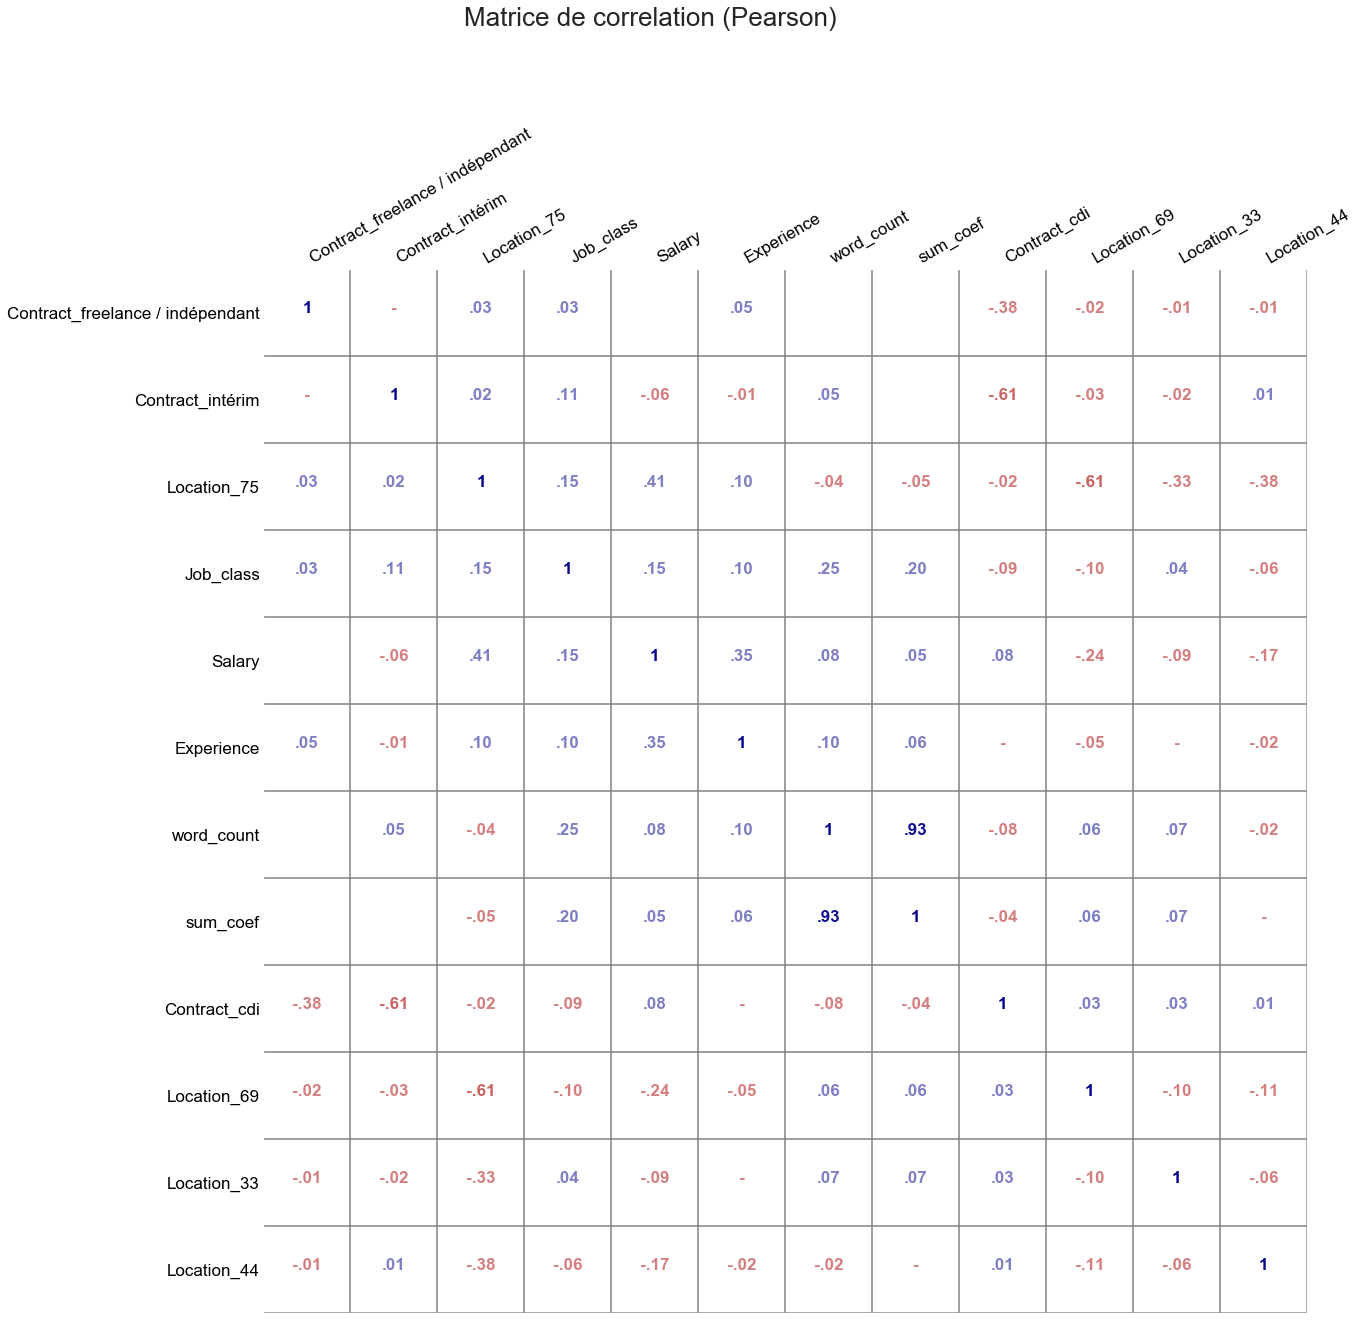

In [73]:

corr = dummy.corr(method='pearson')
c = Corrplot(corr)
#c.plot(method='txt', cmap='PRGn_r', shrink=1, rotation=45, upper='text', lower='ellipse')
c.plot(method='text', fontsize=17, shrink=1, colorbar=False, figsize=(16,16))
#c.plot(method='color') 
fig = plt.gcf()

fig.suptitle('Matrice de correlation (Pearson) ', fontsize=26)
fig.set_size_inches(20,20);

##### correlation de Spearman

In [74]:
dummy.corr(method='spearman')

,Salary,Job_class,Experience,Contract_cdi,Contract_freelance / indépendant,Contract_intérim,Location_33,Location_44,Location_69,Location_75,word_count,sum_coef
Salary,1.000000,0.132272,0.315611,0.081283,0.011463,-0.063601,-0.098199,-0.189236,-0.267385,0.469954,0.024696,0.015035
Job_class,0.132272,1.000000,0.084863,-0.093566,0.025530,0.110470,0.039040,-0.063803,-0.100746,0.146604,0.203088,0.179052
Experience,0.315611,0.084863,1.000000,-0.000147,0.047771,-0.015029,-0.006977,-0.020425,-0.039410,0.094669,0.097037,0.064724
Contract_cdi,0.081283,-0.093566,-0.000147,1.000000,-0.382232,-0.605454,0.028961,0.013920,0.028222,-0.017932,-0.005205,-0.008399
Contract_freelance / indépendant,0.011463,0.025530,0.047771,-0.382232,1.000000,-0.003805,-0.011070,-0.012764,-0.020863,0.033991,-0.003522,-0.001475
Contract_intérim,-0.063601,0.110470,-0.015029,-0.605454,-0.003805,1.000000,-0.017535,0.011616,-0.033047,0.020682,-0.042365,-0.039029
Location_33,-0.098199,0.039040,-0.006977,0.028961,-0.011070,-0.017535,1.000000,-0.058815,-0.096132,-0.325671,0.059215,0.062308
Location_44,-0.189236,-0.063803,-0.020425,0.013920,-0.012764,0.011616,-0.058815,1.000000,-0.110847,-0.375522,-0.002782,0.010010
Location_69,-0.267385,-0.100746,-0.039410,0.028222,-0.020863,-0.033047,-0.096132,-0.110847,1.000000,-0.613778,0.086172,0.071177
Location_75,0.469954,0.146604,0.094669,-0.017932,0.033991,0.020682,-0.325671,-0.375522,-0.613778,1.000000,-0.059328,-0.060881


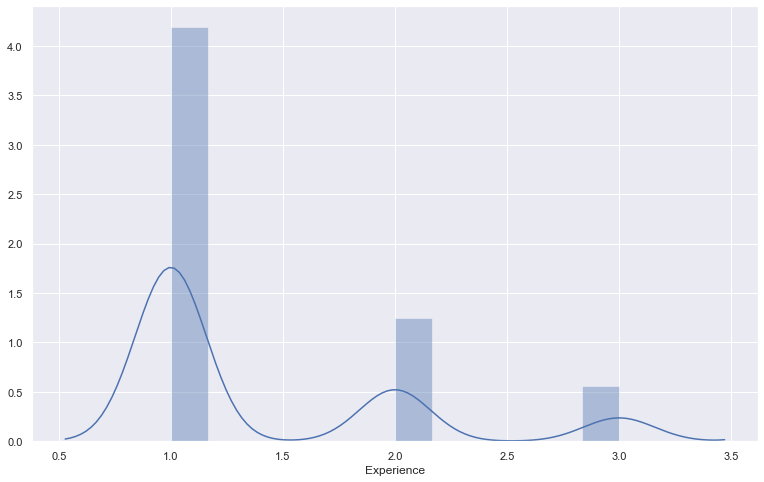

In [75]:
sns.distplot(dummy['Experience'])

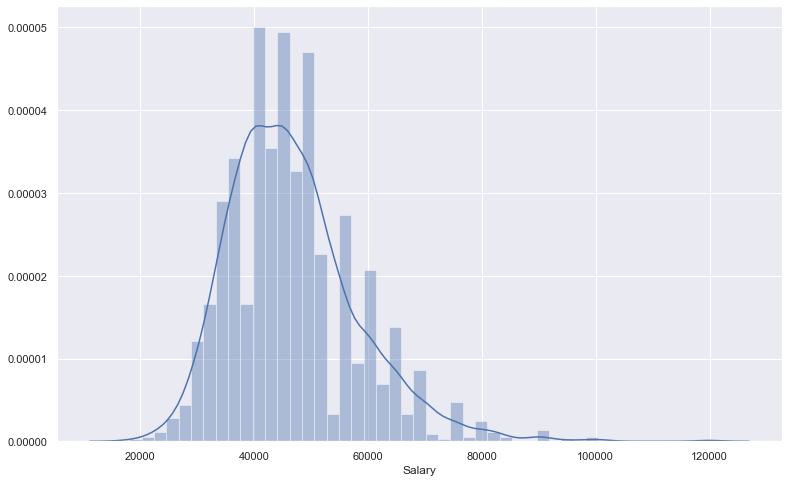

In [76]:
sns.distplot(dummy['Salary'])

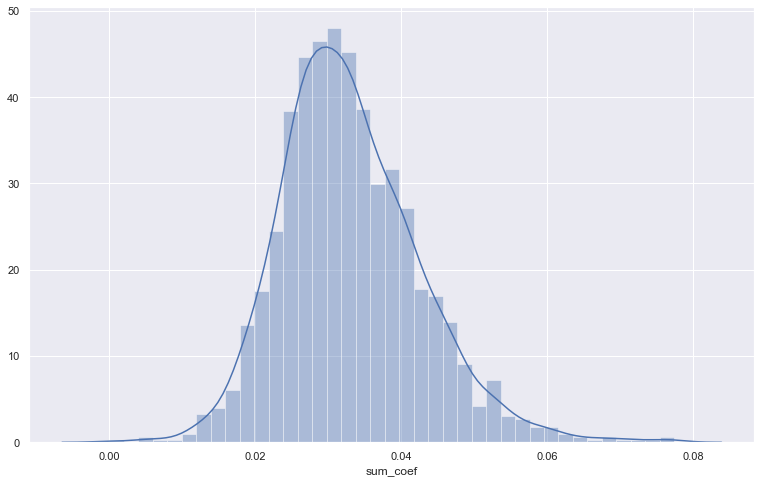

In [77]:
sns.distplot(dummy['sum_coef'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182740F3CF8>,
      dtype=object)

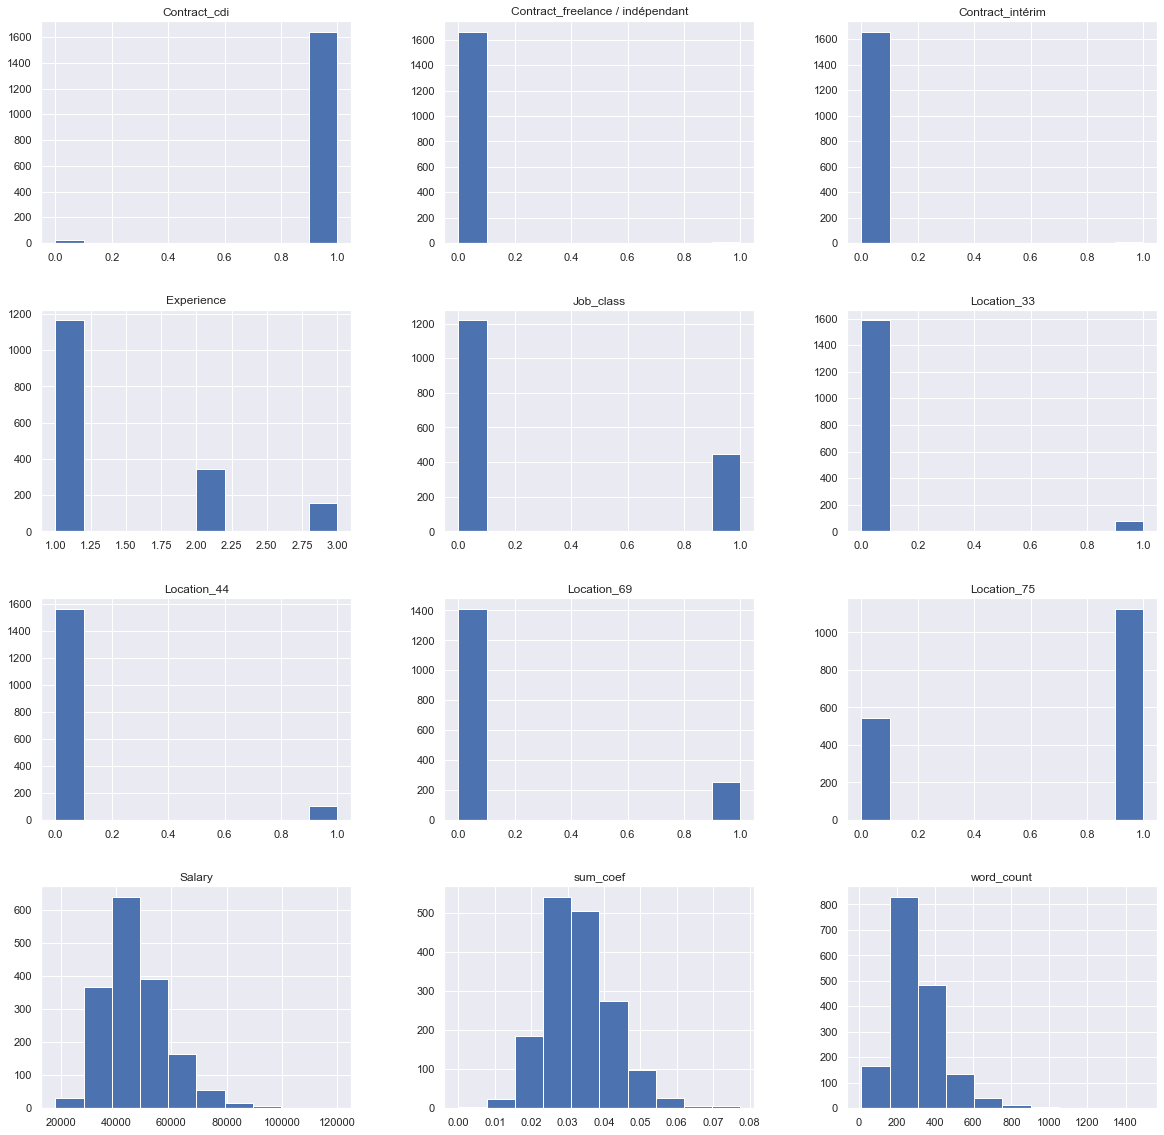

In [79]:
dummy.hist(figsize=(20,20))

In [80]:
!jt

In [81]:
!jt -r

Reset css and font defaults in:
C:\Users\enarm\.jupyter\custom &
C:\Users\enarm\AppData\Roaming\jupyter\nbextensions


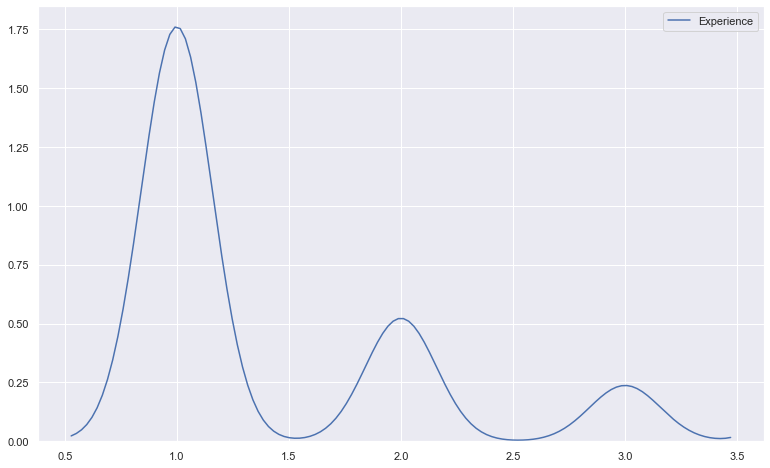

In [82]:
sns.kdeplot(dummy.Experience)

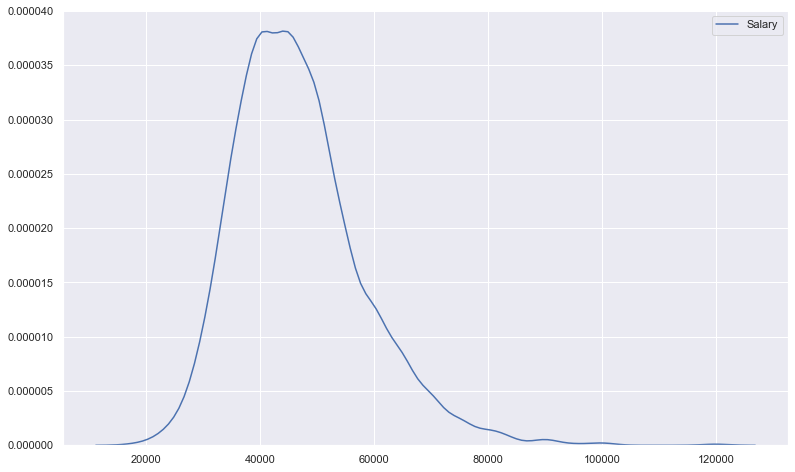

In [83]:
sns.kdeplot(dummy.Salary)

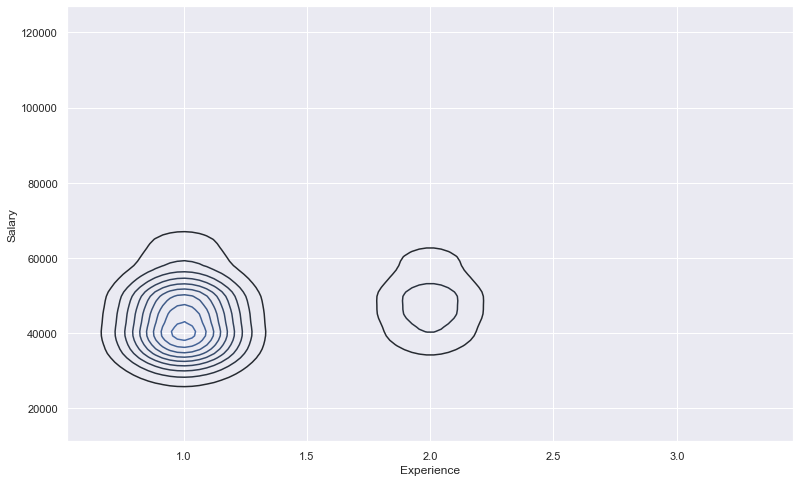

In [84]:
sns.kdeplot(dummy.Experience,dummy.Salary)

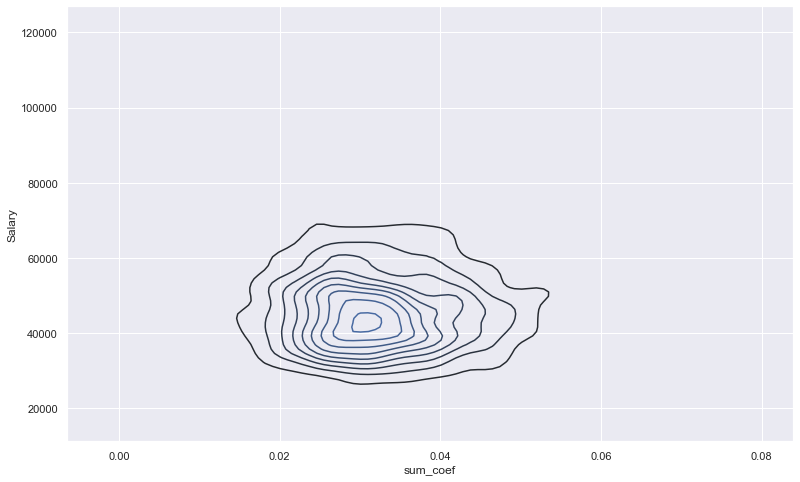

In [85]:
sns.kdeplot(dummy.sum_coef, dummy.Salary)

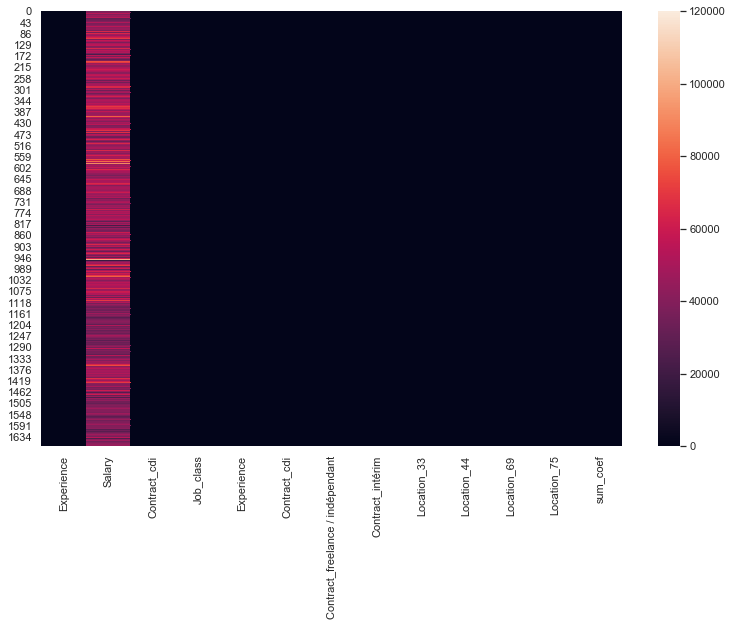

In [86]:
sns.heatmap(dummy[['Experience', 'Salary','Contract_cdi','Job_class','Experience',\
                                  'Contract_cdi','Contract_freelance / indépendant','Contract_intérim',\
                                  'Location_33','Location_44','Location_69','Location_75','sum_coef']])

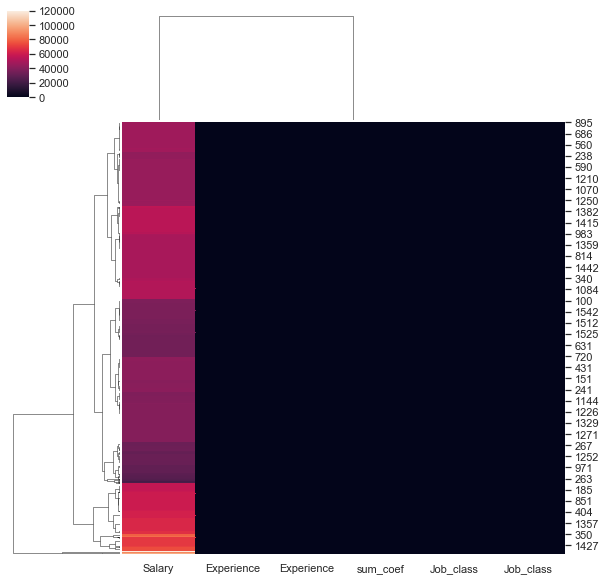

In [87]:
sns.clustermap(dummy[['Experience', 'Job_class','Salary','Job_class','Experience','sum_coef']])

In [88]:
from scipy.spatial.distance import pdist, squareform
import dcor
dcor.distance_correlation(dummy['Salary'], dummy['sum_coef'])

0.0

In [89]:
dcor.distance_correlation(dummy['Salary'], dummy['Experience'])

0.0

In [90]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(dummy['Salary'], dummy['sum_coef'])))
#print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(df3['nouveau_salaire'], df3['Experience'], 
                                                     #                      exponent=1.0, num_resamples=2000)[0]))

distance correlation = 0.00


### Test Random Forest 

#### Choose the n_cluserting = 3

In [92]:
#np.percentile(dummy['Salary'], 25, axis=0)

In [93]:
#Check the range of each category
dummy['Salary_range_3bins'] = pd.cut(dummy['Salary'], bins = 3, labels = [1, 2, 3])
#Categories (3, int64): [1 < 2 < 3],
#array([ 18025.127     ,  52084.66666667,  86042.33333333, 120000.        ]))

dummy['Salary_range_4bins'] = pd.cut(dummy['Salary'], bins = 4, labels = [1, 2, 3, 4])
#Categories (4, int64): [1 < 2 < 3 < 4],
#array([ 18025.127,  43595.25 ,  69063.5  ,  94531.75 , 120000.   ]))

dummy['Salary_range_5bins'] = pd.cut(dummy['Salary'], bins = 5, labels = [1, 2, 3, 4, 5])
#array([ 18025.127,  38501.6  ,  58876.2  ,  79250.8  ,  99625.4  , 120000.   ]))

In [94]:
for i in dummy.columns:
    print(i)

Salary
description
Job_class
Experience
Contract_cdi
Contract_freelance / indépendant
Contract_intérim
Location_33
Location_44
Location_69
Location_75
word_count
corpus
sum_coef
Salary_range_3bins
Salary_range_4bins
Salary_range_5bins


In [95]:
type(dummy.columns)

pandas.core.indexes.base.Index

#### n=3

In [96]:
y=dummy['Salary_range_3bins']
X=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','Contract_freelance / indépendant', 'sum_coef','Contract_intérim' ,'Contract_cdi']]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [98]:
clf_randomforest = RandomForestClassifier(random_state=0)
params_randomforest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],'max_depth': [2, 3, 4, 5, 6]}
grid_randomforest = GridSearchCV(clf_randomforest, params_randomforest, cv=5) 

grid_randomforest.fit(X_train, y_train)
print('Best params: ', grid_randomforest.best_params_)

clf = grid_randomforest.best_estimator_
y_pred_randomforest1 = clf.predict(X_test)

y_pred_randomforest = grid_randomforest.predict(X_test)

accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
print('Random Forest Accuracy: ', accuracy_randomforest)
f1 = f1_score(y_test, y_pred_randomforest, average='micro')
print('f1 score: ', f1)

Best params:  {'max_depth': 5, 'n_estimators': 50}
Random Forest Accuracy:  0.7703349282296651
f1 score:  0.7703349282296652


In [134]:
clf.feature_importances_

array([0.03500274, 0.02831274, 0.06858534, 0.11175846, 0.46446153,
       0.15285509, 0.00066164, 0.12710861, 0.00276795, 0.0084859 ])

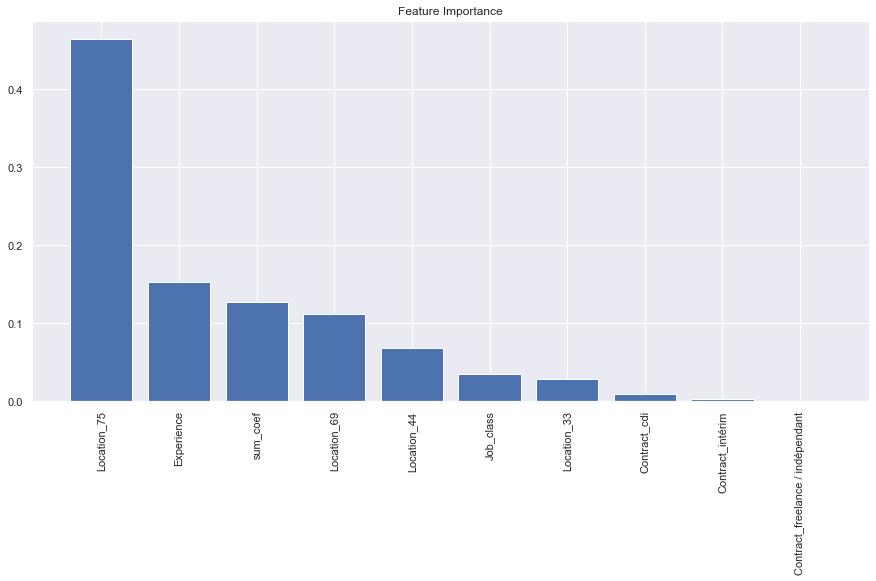

In [137]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

#### Nous pouvons dropper les contracts car ces features n'apporte pas assez d'information


In [139]:
y=dummy['Salary_range_3bins']
X=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','sum_coef']]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [141]:
clf_randomforest = RandomForestClassifier(random_state=0)
params_randomforest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],'max_depth': [2, 3, 4, 5, 6]}
grid_randomforest = GridSearchCV(clf_randomforest, params_randomforest, cv=5) 

grid_randomforest.fit(X_train, y_train)
print('Best params: ', grid_randomforest.best_params_)

clf = grid_randomforest.best_estimator_
y_pred_randomforest1 = clf.predict(X_test)

y_pred_randomforest = grid_randomforest.predict(X_test)

accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
print('Random Forest Accuracy: ', accuracy_randomforest)
f1 = f1_score(y_test, y_pred_randomforest, average='micro')
print('f1 score: ', f1)

Best params:  {'max_depth': 4, 'n_estimators': 150}
Random Forest Accuracy:  0.7727272727272727
f1 score:  0.7727272727272727


In [99]:
n=5

In [142]:
y=dummy['Salary_range_5bins']
X=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','sum_coef']]

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [144]:
clf_randomforest = RandomForestClassifier(random_state=0)
params_randomforest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],'max_depth': [2, 3, 4, 5, 6]}
grid_randomforest = GridSearchCV(clf_randomforest, params_randomforest, cv=5) 

grid_randomforest.fit(X_train, y_train)
print('Best params: ', grid_randomforest.best_params_)

clf = grid_randomforest.best_estimator_
y_pred_randomforest1 = clf.predict(X_test)

y_pred_randomforest = grid_randomforest.predict(X_test)

accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
print('Random Forest Accuracy: ', accuracy_randomforest)
f1 = f1_score(y_test, y_pred_randomforest, average='micro')
print('f1 score: ', f1)

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best params:  {'max_depth': 6, 'n_estimators': 250}
Random Forest Accuracy:  0.6435406698564593
f1 score:  0.6435406698564593


#### n=4

In [146]:
y=dummy['Salary_range_4bins']
X=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','sum_coef']]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [148]:
clf_randomforest = RandomForestClassifier(random_state=0)
params_randomforest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],'max_depth': [2, 3, 4, 5, 6]}
grid_randomforest = GridSearchCV(clf_randomforest, params_randomforest, cv=5) 

grid_randomforest.fit(X_train, y_train)
print('Best params: ', grid_randomforest.best_params_)

clf = grid_randomforest.best_estimator_
y_pred_randomforest1 = clf.predict(X_test)

y_pred_randomforest = grid_randomforest.predict(X_test)

accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
print('Random Forest Accuracy: ', accuracy_randomforest)
f1 = f1_score(y_test, y_pred_randomforest, average='micro')
print('f1 score: ', f1)

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best params:  {'max_depth': 4, 'n_estimators': 150}
Random Forest Accuracy:  0.7009569377990431
f1 score:  0.7009569377990431


## La repartitions des salaires en 3 classes donne un bon resultat: 
[ 18025.127     ,  52084.66666667,  86042.33333333, 120000.        ]))

In [106]:
y=dummy['Salary_range_3bins']
X=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','Contract_freelance / indépendant', 'sum_coef','Contract_intérim' ,'Contract_cdi']]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

#### Bagging

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.80      0.83      0.82       307
           2       0.48      0.42      0.45       111
           3       0.00      0.00      0.00         0

    accuracy                           0.72       418
   macro avg       0.43      0.42      0.42       418
weighted avg       0.72      0.72      0.72       418

accuracy is  0.7248803827751196


C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


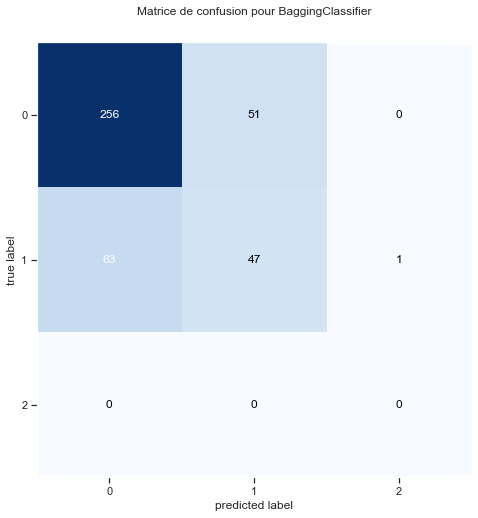

In [108]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_test,y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred))
plt.title('Matrice de confusion pour BaggingClassifier')
plt.show()

#### AdaBoost

              precision    recall  f1-score   support

           1       0.78      0.97      0.86       307
           2       0.71      0.23      0.34       111

    accuracy                           0.77       418
   macro avg       0.74      0.60      0.60       418
weighted avg       0.76      0.77      0.72       418

accuracy is  0.7703349282296651


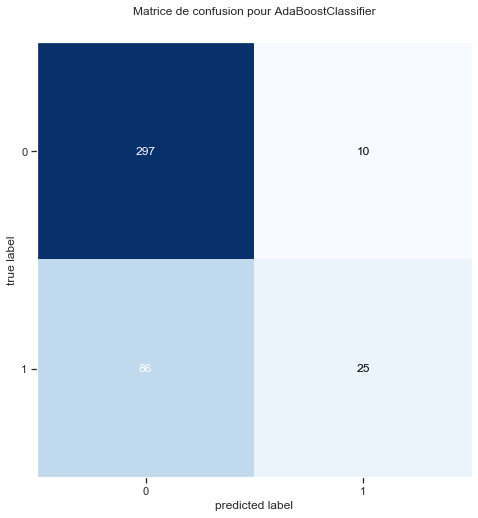

In [109]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))

#Accuracy Score
print('accuracy is ',accuracy_score(y_test,y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred))
plt.title('Matrice de confusion pour AdaBoostClassifier')
plt.show()

#### GradientBoosting

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.80      0.91      0.85       307
           2       0.58      0.34      0.43       111
           3       0.00      0.00      0.00         0

    accuracy                           0.76       418
   macro avg       0.46      0.42      0.43       418
weighted avg       0.74      0.76      0.74       418

accuracy is  0.7607655502392344


C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


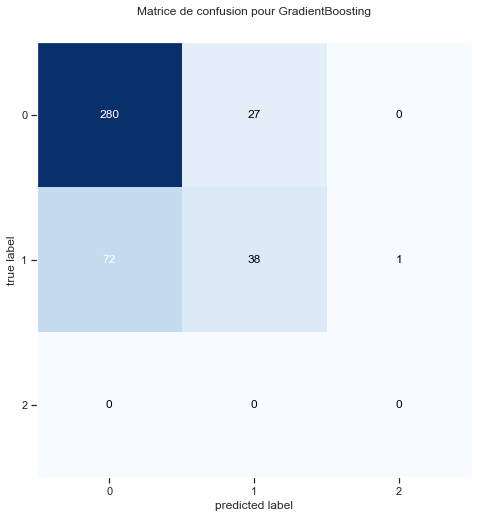

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))

#Accuracy Score
print('accuracy is ',accuracy_score(y_test,y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred))
plt.title('Matrice de confusion pour GradientBoosting')
plt.show()

#### LinearDiscriminantAnalysis

              precision    recall  f1-score   support

           1       0.79      0.93      0.85       307
           2       0.62      0.30      0.40       111

    accuracy                           0.77       418
   macro avg       0.70      0.62      0.63       418
weighted avg       0.74      0.77      0.73       418

accuracy is  0.7655502392344498


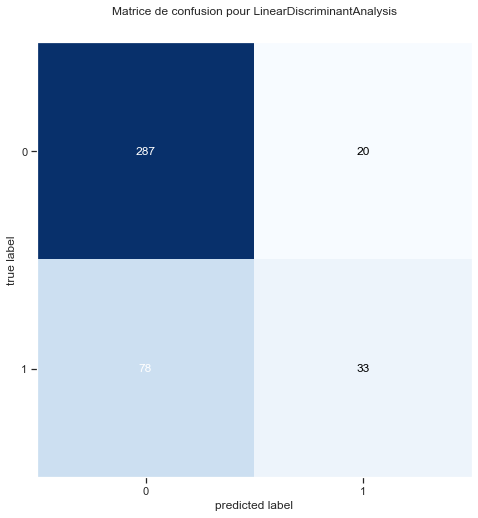

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))

#Accuracy Score
print('accuracy is ',accuracy_score(y_test,y_pred))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred))
plt.title('Matrice de confusion pour LinearDiscriminantAnalysis')
plt.show()

#### QuadraticDiscriminantAnalysis

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\enarm\Miniconda3\lib\site-packages\sklea

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     307.0
           2       0.00      0.00      0.00     111.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00     418.0
   macro avg       0.00      0.00      0.00     418.0
weighted avg       0.00      0.00      0.00     418.0

accuracy is  0.0


C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


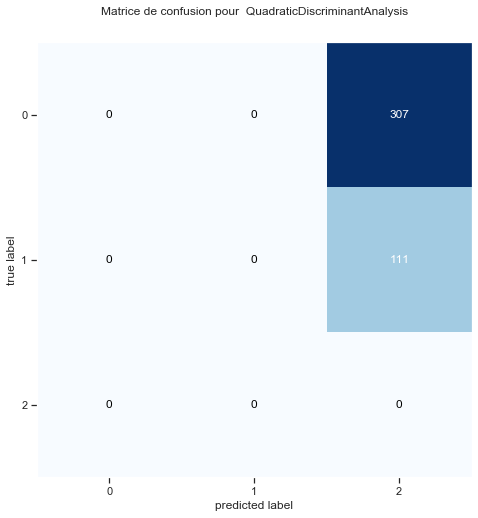

In [112]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(classification_report(y_test,y_pred))

#Accuracy Score
print('accuracy is ',accuracy_score(y_test,y_pred))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred))
plt.title('Matrice de confusion pour  QuadraticDiscriminantAnalysis')
plt.show()

#### RandomForest

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.80      0.81      0.81       307
           2       0.47      0.44      0.46       111
           3       0.00      0.00      0.00         0

    accuracy                           0.72       418
   macro avg       0.43      0.42      0.42       418
weighted avg       0.72      0.72      0.72       418

accuracy is  0.715311004784689


C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


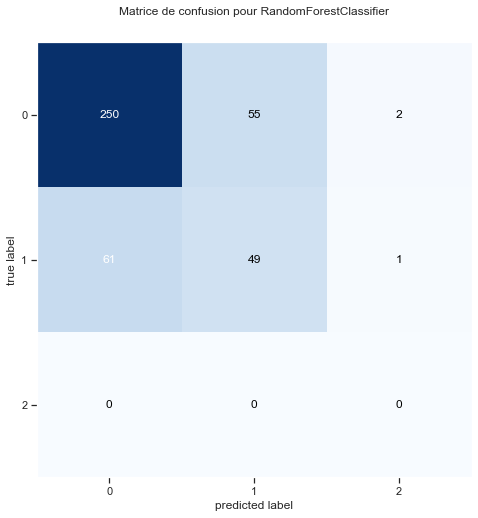

In [113]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

rfc_predictions = rfc_model.predict(X_test)


print(classification_report(y_test,rfc_predictions))
#print(confusion_matrix(y_pred,y_val))
print('accuracy is ',accuracy_score(y_test,rfc_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rfc_predictions))
plt.title('Matrice de confusion pour RandomForestClassifier')
plt.show()

#### LogisticRegression

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Predictions:
[[287  20]
 [ 79  32]]
              precision    recall  f1-score   support

           1       0.78      0.93      0.85       307
           2       0.62      0.29      0.39       111

    accuracy                           0.76       418
   macro avg       0.70      0.61      0.62       418
weighted avg       0.74      0.76      0.73       418



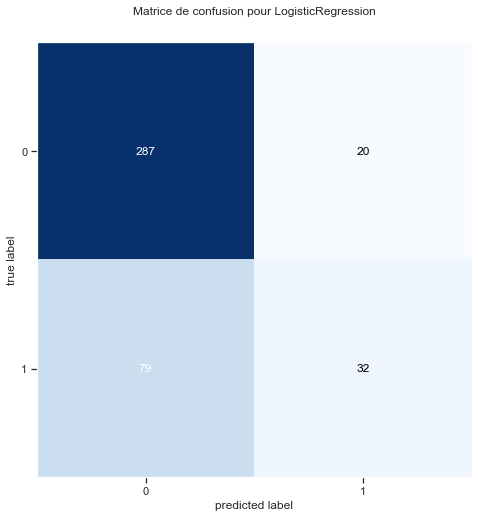

In [114]:
#Classify with Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(multi_class='auto')

log_model.fit(X_train, y_train)

log_predictions = log_model.predict(X_test)



print("Logistic Regression Predictions:")

print(confusion_matrix(y_test, log_predictions))

print(classification_report(y_test, log_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, log_predictions))
plt.title('Matrice de confusion pour LogisticRegression')
plt.show()

#### KNN

K Nearest Neighbors Predictions:
[[254  53]
 [ 64  47]]
              precision    recall  f1-score   support

           1       0.80      0.83      0.81       307
           2       0.47      0.42      0.45       111

    accuracy                           0.72       418
   macro avg       0.63      0.63      0.63       418
weighted avg       0.71      0.72      0.72       418



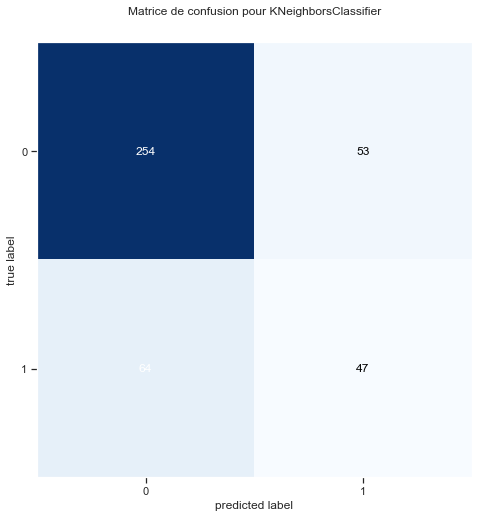

In [115]:

#Classify with KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)



print("K Nearest Neighbors Predictions:")

print(confusion_matrix(y_test, knn_predictions))

print(classification_report(y_test, knn_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, knn_predictions))
plt.title('Matrice de confusion pour KNeighborsClassifier')
plt.show()

#### DecisionTree

Decision Tree Predictions:


C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.82      0.79      0.80       307
           2       0.46      0.50      0.48       111
           3       0.00      0.00      0.00         0

    accuracy                           0.71       418
   macro avg       0.43      0.43      0.43       418
weighted avg       0.72      0.71      0.72       418



C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


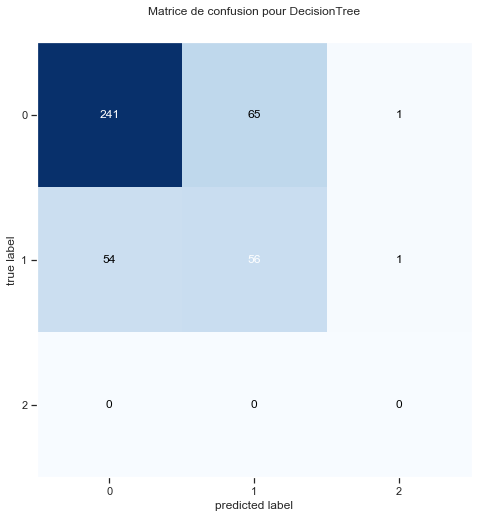

In [116]:
#Classify with Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)



print("Decision Tree Predictions:")

#print(confusion_matrix(y_test,tree_predictions))

print(classification_report(y_test,tree_predictions))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, tree_predictions))
plt.title('Matrice de confusion pour DecisionTree')
plt.show()

#### Ada Boost 

ADA Boost Classifier Predictions:
[[297  10]
 [ 86  25]]
              precision    recall  f1-score   support

           1       0.78      0.97      0.86       307
           2       0.71      0.23      0.34       111

    accuracy                           0.77       418
   macro avg       0.74      0.60      0.60       418
weighted avg       0.76      0.77      0.72       418



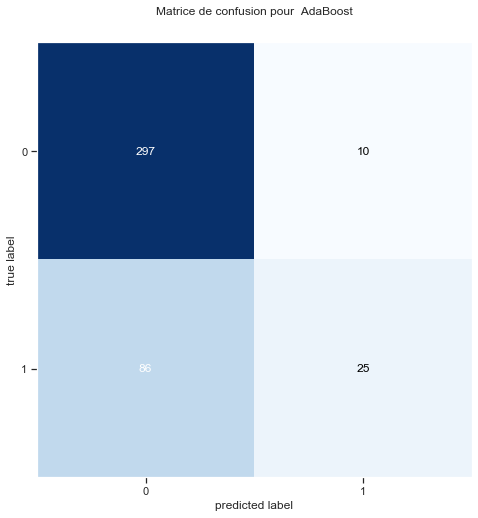

In [117]:
#Classify with Ada Boost Classifier

from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()

ada_model.fit(X_train, y_train)

ada_predictions = ada_model.predict(X_test)



print("ADA Boost Classifier Predictions:")

print(confusion_matrix(y_test,ada_predictions))

print(classification_report(y_test,ada_predictions))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,ada_predictions))
plt.title('Matrice de confusion pour  AdaBoost')
plt.show()

#### MLP

Multilayer Perceptron Predictions:
[[286  21]
 [ 78  33]]
              precision    recall  f1-score   support

           1       0.79      0.93      0.85       307
           2       0.61      0.30      0.40       111

    accuracy                           0.76       418
   macro avg       0.70      0.61      0.63       418
weighted avg       0.74      0.76      0.73       418



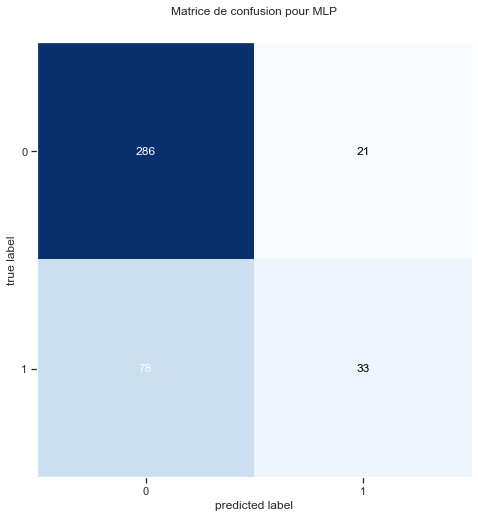

In [118]:
#Classify with MLP Classifier

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()

mlp_model.fit(X_train, y_train)

mlp_predictions = mlp_model.predict(X_test)



print("Multilayer Perceptron Predictions:")

print(confusion_matrix(y_test, mlp_predictions))

print(classification_report(y_test, mlp_predictions))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,mlp_predictions))
plt.title('Matrice de confusion pour MLP')
plt.show()

#### SVC

Support Vector Classifier Predictions:
[[299   8]
 [ 88  23]]
              precision    recall  f1-score   support

           1       0.77      0.97      0.86       307
           2       0.74      0.21      0.32       111

    accuracy                           0.77       418
   macro avg       0.76      0.59      0.59       418
weighted avg       0.76      0.77      0.72       418



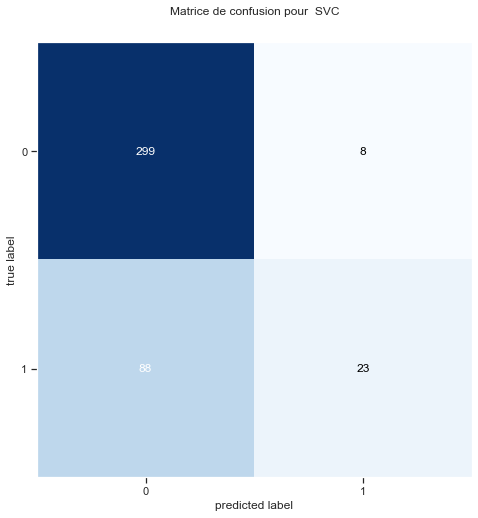

In [119]:
#Classify with SVC

from sklearn.svm import SVC

svc_model = SVC(kernel='linear', C=1, random_state=0)

svc_model.fit(X_train, y_train)

svc_predictions = svc_model.predict(X_test)



print("Support Vector Classifier Predictions:")

print(confusion_matrix(y_test, svc_predictions))

print(classification_report(y_test, svc_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,svc_predictions))
plt.title('Matrice de confusion pour  SVC')
plt.show()

#### Kernel SVM

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Classifier Predictions:
[[288  19]
 [ 79  32]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85       307
           2       0.63      0.29      0.40       111

    accuracy                           0.77       418
   macro avg       0.71      0.61      0.62       418
weighted avg       0.74      0.77      0.73       418



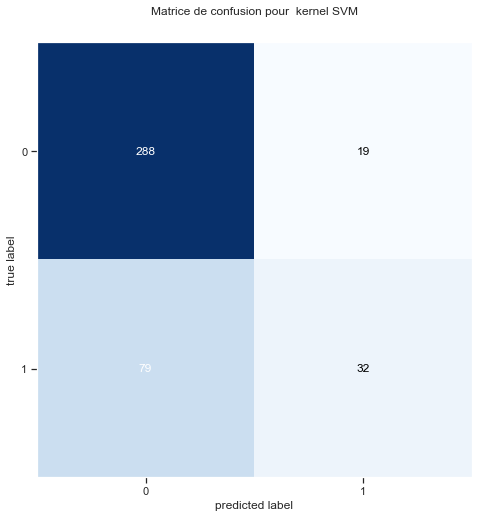

In [120]:
#Classify with SVC

from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', C=1, random_state=0)

svc_model.fit(X_train, y_train)

svc_predictions = svc_model.predict(X_test)



print("Support Vector Classifier Predictions:")

print(confusion_matrix(y_test, svc_predictions))

print(classification_report(y_test, svc_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,svc_predictions))
plt.title('Matrice de confusion pour  kernel SVM')
plt.show()

#### Gaussian Process

Gaussian Process Classifier Predictions:
[[288  19]
 [ 79  32]]
              precision    recall  f1-score   support

           1       0.78      0.94      0.85       307
           2       0.63      0.29      0.40       111

    accuracy                           0.77       418
   macro avg       0.71      0.61      0.62       418
weighted avg       0.74      0.77      0.73       418



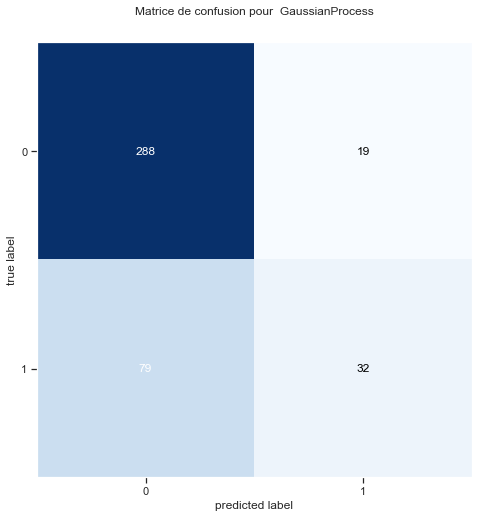

In [121]:
#Classify with Gaussian Process Classifier

from sklearn.gaussian_process import GaussianProcessClassifier

gp_model = GaussianProcessClassifier()

gp_model.fit(X_train, y_train)

gp_predictions = gp_model.predict(X_test)



print("Gaussian Process Classifier Predictions:")

print(confusion_matrix(y_test,gp_predictions))

print(classification_report(y_test,gp_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,gp_predictions))
plt.title('Matrice de confusion pour  GaussianProcess')
plt.show()

#### Random Forest

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier Predictions:


C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.80      0.80      0.80       307
           2       0.44      0.42      0.43       111
           3       0.00      0.00      0.00         0

    accuracy                           0.70       418
   macro avg       0.41      0.41      0.41       418
weighted avg       0.70      0.70      0.70       418



C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


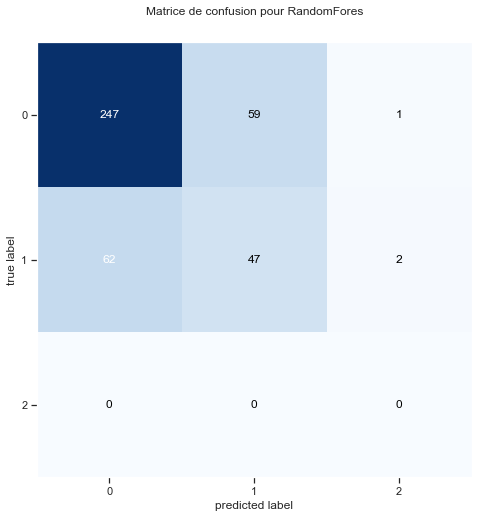

In [122]:
#Classify with Random Forest Classifer

from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)

rfc_predictions = rfc_model.predict(X_test)



print("Random Forest Classifier Predictions:")

print(classification_report(y_test,rfc_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, rfc_predictions))
plt.title('Matrice de confusion pour RandomFores')
plt.show()


#### Naive Bayes

Gaussian Naive Bayes Classifier Predictions:


C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.93      0.44      0.60       307
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00         0

    accuracy                           0.32       418
   macro avg       0.31      0.15      0.20       418
weighted avg       0.68      0.32      0.44       418



C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


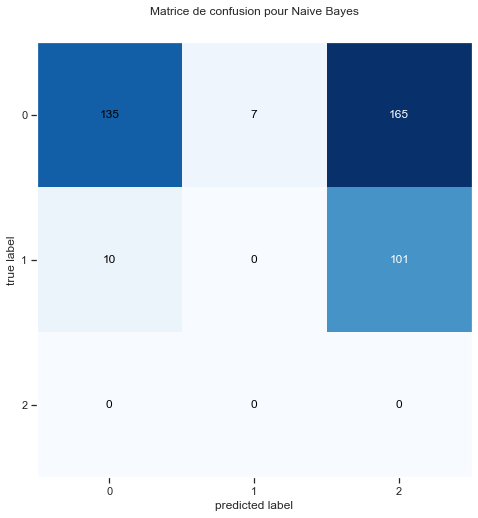

In [123]:
#Classify with Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)



print("Gaussian Naive Bayes Classifier Predictions:")


print(classification_report(y_test,nb_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, nb_predictions))
plt.title('Matrice de confusion pour Naive Bayes')
plt.show()

#### Qaudratic Discriminant Analysi

C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Quadratic Discriminant Analysis Classifier Predictions:


C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\enarm\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     307.0
           2       0.00      0.00      0.00     111.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00     418.0
   macro avg       0.00      0.00      0.00     418.0
weighted avg       0.00      0.00      0.00     418.0



C:\Users\enarm\Miniconda3\lib\site-packages\mlxtend\plotting\plot_confusion_matrix.py:66: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


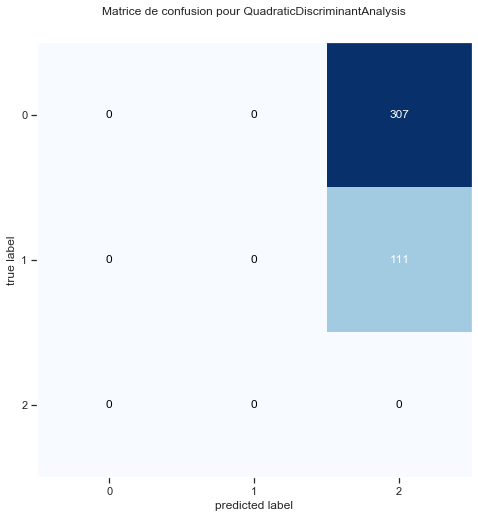

In [124]:
#Classify with Qaudratic Discriminant Analysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()

qda_model.fit(X_train, y_train)

qda_predictions = qda_model.predict(X_test)



print("Quadratic Discriminant Analysis Classifier Predictions:")

#print(confusion_matrix(y_test,qda_predictions))

print(classification_report(y_test,qda_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,qda_predictions))
plt.title('Matrice de confusion pour QuadraticDiscriminantAnalysis')
plt.show()


#### RandomForestRegressor 

In [125]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 
rfr_predictions = regressor.predict(X_test)  # test the output by changing values 

In [126]:

from sklearn.metrics import mean_squared_error
print('mse: ', mean_squared_error(y_test,rfr_predictions))

mse:  0.20309856459330144


#### Xgboost

In [127]:
import xgboost as xgb
from sklearn.model_selection import learning_curve,GridSearchCV


In [128]:
import xgboost as xgb

param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
xgbst_predictions=model.predict(X_test)

              precision    recall  f1-score   support

           1       0.79      0.92      0.85       307
           2       0.59      0.33      0.43       111

    accuracy                           0.76       418
   macro avg       0.69      0.62      0.64       418
weighted avg       0.74      0.76      0.74       418



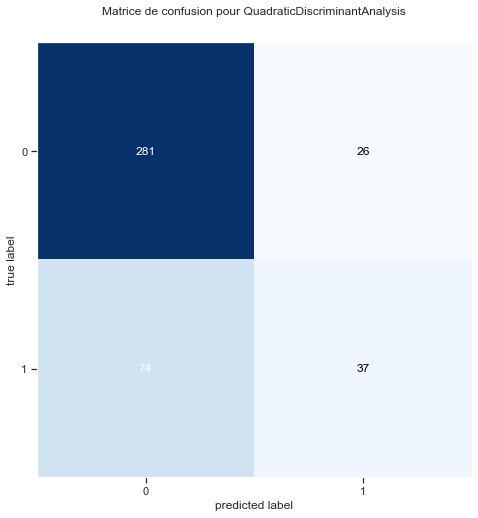

In [129]:
#print(confusion_matrix(y_test,qda_predictions))

print(classification_report(y_test,xgbst_predictions))

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,xgbst_predictions))
plt.title('Matrice de confusion pour QuadraticDiscriminantAnalysis')
plt.show()

In [130]:
# training and testing - numpy matrices
#bst = xgb.train(param, X_train, num_round)
#preds = bst.predict(dtest)


# extracting most confident predictions
#best_preds = np.asarray([np.argmax(line) for line in preds])
#print("Numpy array precision:", precision_score(y_test, best_preds, average='macro')

# ------------- svm file ---------------------
# training and testing - svm file
#bst_svm = xgb.train(param, X_train, num_round)
#preds = bst.predict(dtest_svm)

# extracting most confident predictions
#best_preds_svm = [np.argmax(line) for line in preds]
#print("Svm file precision:",precision_score(y_test, best_preds_svm, average='macro')

In [131]:
xgbst_predictions

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,

In [132]:
predictions = [round(value) for value in xgbst_predictions]

In [133]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.08%


#### Retestons les modèles avec une repartitions 

In [149]:
[20000., 40000., 60000., 120000.]

[20000.0, 40000.0, 60000.0, 120000.0]

In [220]:
y=dummy['Salary_range_3bins'] = pd.cut(dummy['Salary'], bins = [15000., 40000., 60000., 130000.], labels = [1, 2, 3])
X1=dummy[['Job_class', 'Location_33','Location_44', 'Location_69', 'Location_75','Experience','Contract_freelance / indépendant', 'sum_coef','Contract_intérim' ,'Contract_cdi']]

In [221]:
type(y[1])

numpy.int64

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### AdaBoost

In [223]:
clf_randomforest = RandomForestClassifier(random_state=0)
params_randomforest = {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],'max_depth': [2, 3, 4, 5, 6]}
grid_randomforest = GridSearchCV(clf_randomforest, params_randomforest, cv=5) 

grid_randomforest.fit(X_train, y_train)
print('Best params: ', grid_randomforest.best_params_)

clf = grid_randomforest.best_estimator_
y_pred_randomforest1 = clf.predict(X_test)

y_pred_randomforest = grid_randomforest.predict(X_test)

accuracy_randomforest = accuracy_score(y_test, y_pred_randomforest)
print('Random Forest Accuracy: ', accuracy_randomforest)
f1 = f1_score(y_test, y_pred_randomforest, average='micro')
print('f1 score: ', f1)

Best params:  {'max_depth': 3, 'n_estimators': 300}
Random Forest Accuracy:  0.6746411483253588
f1 score:  0.6746411483253588
